In [2]:
using PyPlot, HDF5

In [3]:
# A recording of an experiment with facilitated activity, due to an induced cortical lesion.
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
# file variables
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos"
 "CanalesMalos"
 "LFPSaturados"
 "desde"
 "freq"
 "hasta"

In [5]:
canales=read(arx["CanalesBuenos"])
malos=read(arx["CanalesMalos"])
#lfp=read(arx["dset"]);
lfp=read(arx["LFPSaturados"]);
#freq=read(arx["SamplingRate"])/1000
freq=read(arx["freq"])

retraso=0

dd=size(lfp)
if length(dd)==2
    nmax=dd[2]
    lfp=reshape(lfp, 64,64,nmax)
end
nmax=size(lfp,3)
typeof(lfp)


Array{Float32,3}

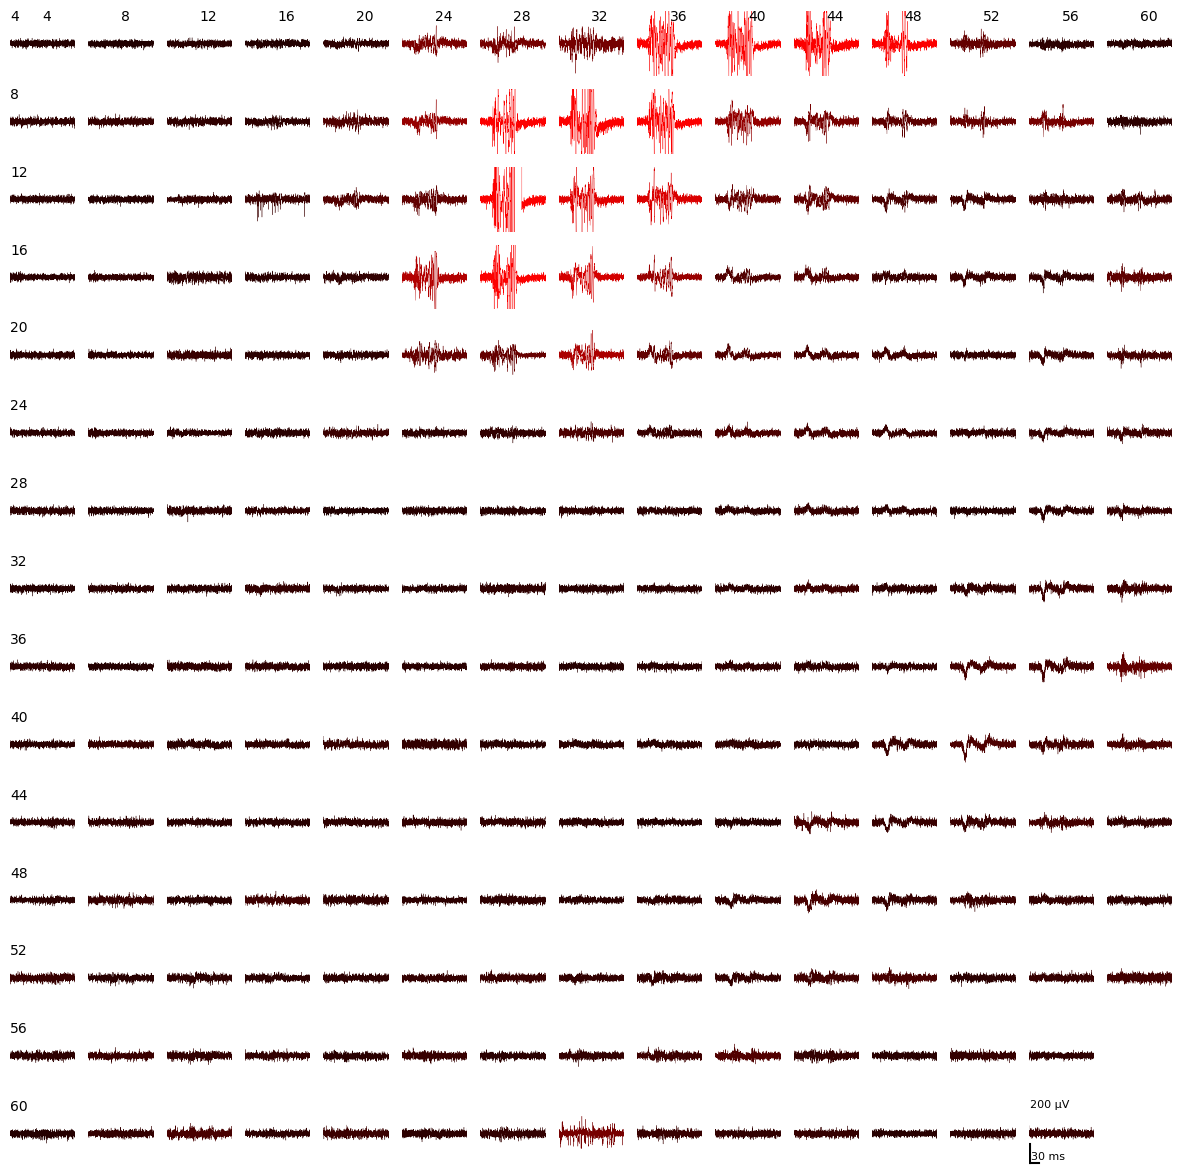

In [21]:
cuadros=1:nmax
tiempo=(cuadros.-retraso)./freq
t=700
outname="MosaicoBlabla.png"


farofa, lista=subplots(15,15, sharex=true, sharey=true, figsize=(15,6*2.5))

xmini=40
xmaxi=260
ymini=-350
ymaxi=350

for j=1:15,k=1:15
    #xlim(tiempo[1], tiempo[end])
    xlim(xmini,xmaxi)
    ylim(ymini,ymaxi)
    talrow=(j-1)*4+4
    talcol=(k-1)*4+4
    yys=vec(lfp[talrow,talcol,cuadros])
    xxs=tiempo
    rojo=maximum(yys[70:nmax])/400
    if rojo>1
        rojo=0.99
    end
    lista[16-j,k].axis("off")
    lista[16-j,k].plot(xxs,yys, color=(rojo,0,0), lw=0.25)

end


for j=1:15
    talrow=(j-1)*4+4
    talcol=(j-1)*4+4
    lista[1,j].annotate("$talcol", xy=((xmini+xmaxi)/2,ymaxi*0.7))
    lista[j,1].annotate("$talrow", xy=(xmini,ymaxi*0.7))
end

lista[15,14].plot([xmini+5,xmini+5+30],[ymini*0.9,ymini*0.9], lw=1.5, c="k")
lista[15,14].annotate("30 ms", xy=(xmini+6,ymini*0.8), fontsize=8)

lista[15,14].plot([xmini+5,xmini+5],[ymini*0.9,ymini*0.9+200], lw=1.5, c="k")
lista[15,14].annotate("200 µV", xy=(xmini+5,-ymini*0.8), fontsize=8)

savefig(outname,dpi=92)


In [10]:
tiempo

0.1424083896381183:0.1424083896381183:284.81677927623656